# Introduction à l'apprentissage automatique: TP5 - Exercice 2

<br>

### Reconnaissance d'images par réseaux de neurones

<br>

On reprend la base de données Fashion-MNIST du TP4. Rappelons que l'on se restreint à un sous-ensemble de 10000 observations pour garder des temps de calcul raisonnables pendant la séance. Néanmoins, il serait plus satisfaisant d'utiliser l'ensemble de la base de données à notre disposition (à faire si vous avez une machine performante et du temps). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import datasets, metrics, neural_network, model_selection
%matplotlib inline 

# Fashion-Mnist database sur openML: (il faut quelques dizaines de secondes pour charger la base)
size_images=(28,28)
X_fashion, y_fashion = datasets.fetch_openml(data_id=40996, return_X_y=True, as_frame=False, parser='auto')
X_fashion=X_fashion[:10000,:]/255.  # normalisation des niveaux de gris entre 0 et 1
y_fashion=y_fashion[:10000]

for i in range(10):
    n=np.sum(y_fashion==str(i))
    print("nombre d'observations dans la classe %d: %d" %(i,n))

n_samples = len(X_fashion)
print("nombre total d'observations (apprentissage + test): %d" % n_samples)

n_features = len(X_fashion[0])
print("nombre de caractéristiques par observation: %d" % n_features)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_fashion, y_fashion, test_size=0.2, random_state=1)

print("nombre d'observations dans la base d'apprentissage: %d" %len(X_train))
print("nombre d'observations dans la base de test: %d" %len(X_test))

nombre d'observations dans la classe 0: 942
nombre d'observations dans la classe 1: 1027
nombre d'observations dans la classe 2: 1016
nombre d'observations dans la classe 3: 1019
nombre d'observations dans la classe 4: 974
nombre d'observations dans la classe 5: 989
nombre d'observations dans la classe 6: 1021
nombre d'observations dans la classe 7: 1022
nombre d'observations dans la classe 8: 990
nombre d'observations dans la classe 9: 1000
nombre total d'observations (apprentissage + test): 10000
nombre de caractéristiques par observation: 784
nombre d'observations dans la base d'apprentissage: 8000
nombre d'observations dans la base de test: 2000


__Remarque__: ici, les données d'apprentissage sont les vecteurs des niveaux de gris pixel à pixel. On divise par 255 le niveau de gris (codé sur 8 bits, donc entre 0 et 255) de manière à normaliser les données entre 0 et 1. Comme on l'a déjà dit, cette manipulation améliore le comportement des algorithmes d'optimisation numérique. 

La cellule suivante définit la fonction qui permet d'afficher les 150 premières images de la base de test, ainsi que la classe véritable et la classe déterminée par l'algorithme de classification:

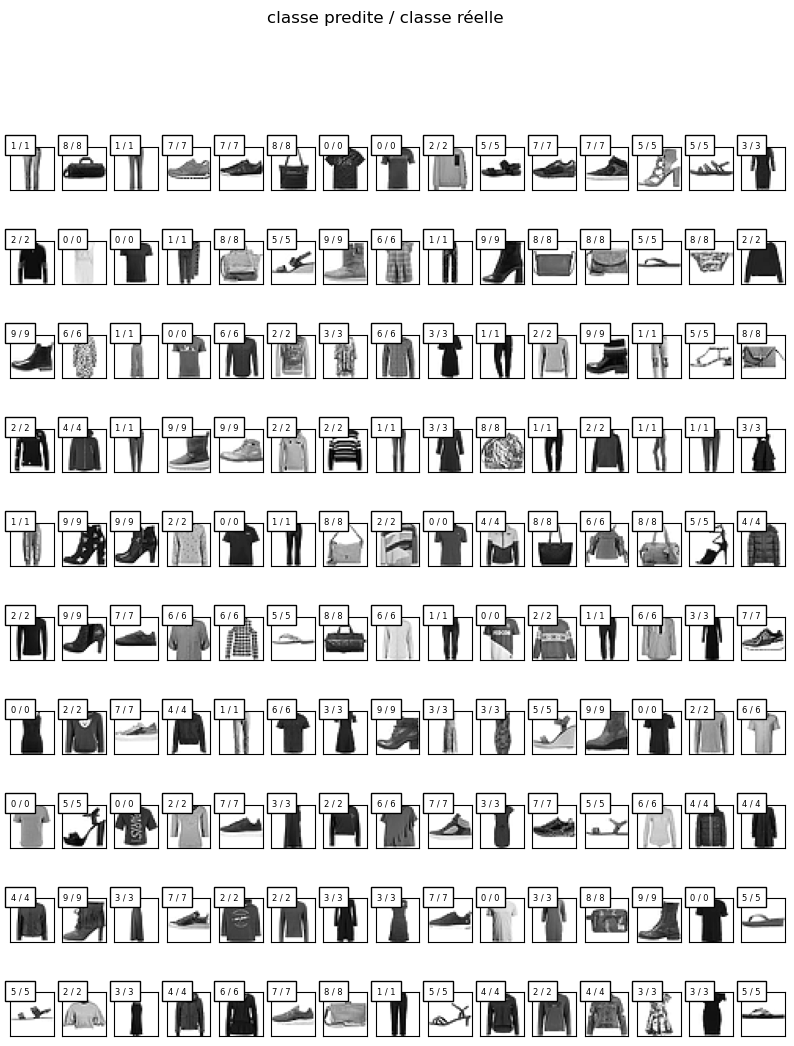

In [3]:
def affichage_150_images(X_test,y_test,y_pred):
    plt.figure(figsize=[10,12])   
    for n in range(150):
        plt.subplot(10,15,n+1,xticks=[],yticks=[])
        plt.imshow(np.reshape(X_test[n,:],size_images),cmap='gray_r')
        if y_pred[n]==y_test[n]:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='white', alpha=1))    
        else:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='red', alpha=1))    
    plt.suptitle('classe predite / classe réelle')
    plt.show()
affichage_150_images(X_test,y_test,y_test)

L'entraînement d'un réseau de neurones _feedforward_ (perceptron multicouche) peut se faire de la manière suivante:

In [4]:
MLP = neural_network.MLPClassifier(hidden_layer_sizes=(10,), max_iter=20, alpha=0,
                    solver='sgd', verbose=True, learning_rate_init=.01, random_state=1)
MLP.fit(X_train, y_train)
print("Score sur l'ensemble d'apprentissage: %.3f" % MLP.score(X_train, y_train))
print("Score sur l'ensemble de test: %.3f" % MLP.score(X_test, y_test))

Iteration 1, loss = 2.19721911
Iteration 2, loss = 1.98881370
Iteration 3, loss = 1.82557158
Iteration 4, loss = 1.68649158
Iteration 5, loss = 1.55523789
Iteration 6, loss = 1.43334261
Iteration 7, loss = 1.32533443
Iteration 8, loss = 1.23499262
Iteration 9, loss = 1.16178731
Iteration 10, loss = 1.10379697
Iteration 11, loss = 1.05735600
Iteration 12, loss = 1.01948606
Iteration 13, loss = 0.98691317
Iteration 14, loss = 0.95916070
Iteration 15, loss = 0.93475991
Iteration 16, loss = 0.91296690
Iteration 17, loss = 0.89326970
Iteration 18, loss = 0.87537793
Iteration 19, loss = 0.85751341
Iteration 20, loss = 0.84124224
Score sur l'ensemble d'apprentissage: 0.701
Score sur l'ensemble de test: 0.686


c:\Users\diogo\miniconda3\envs\ia\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Chaque itération correspond à un parcours de la base d'apprentissage (une _epoch_ ): ce n'est pas une itération de l'algorithme de descente. On voit que le _loss_ décroît au fur et à mesure des itérations, ce qui est logique. Cependant, une faible augmentation du loss pourrait être observée d'une itération à l'autre car on utilise l'algorithme du gradient stochastique.

Consultez la documentation __[ici](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)__ et __[là](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)__ et faites le lien avec le cours. En particulier, notez que dans la cellule précédente: on a déclaré un réseau à une seule couche cachée de 10 neurones (`hidden_layer_sizes=(10,)`), on n'a pas de régularisation $L^2$ des poids (car `alpha=0`), et on a précisé le solveur _Stochastic Gradient Descent_ pour lequel on a fixé le taux d'apprentissage ( `learning_rate=.1` ). Notez qu'il existe d'autres solveurs (on ne pourra pas rentrer dans les détails dans ce cours), et notez également dans la documentation comment est fixée la taille du lot ( _batch_ ).

Comme on l'a vu en cours, le loss (entropie croisée après la couche SoftMax) n'est pas le taux de classifications correctes. Le petit script suivant permet de suivre l'évolution du taux de classification sur la base d'apprentissage et sur la base de test au cours des itérations (ignorez l'avertissement). Notez les valeurs des paramètres.


 149 / 150
temps par epoch: 0.829 s


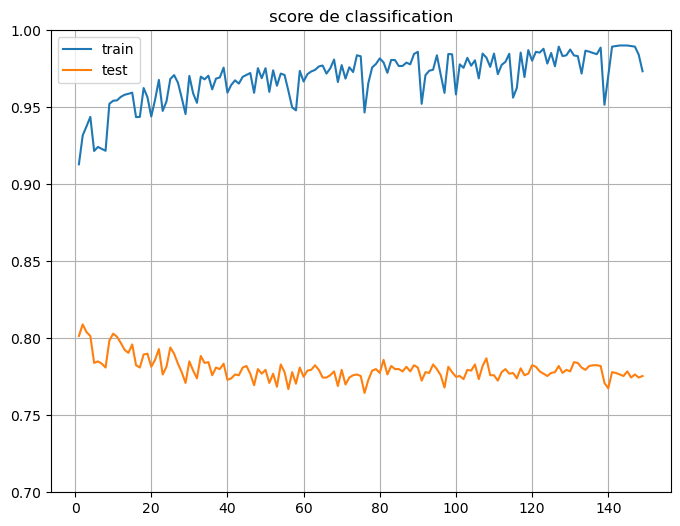

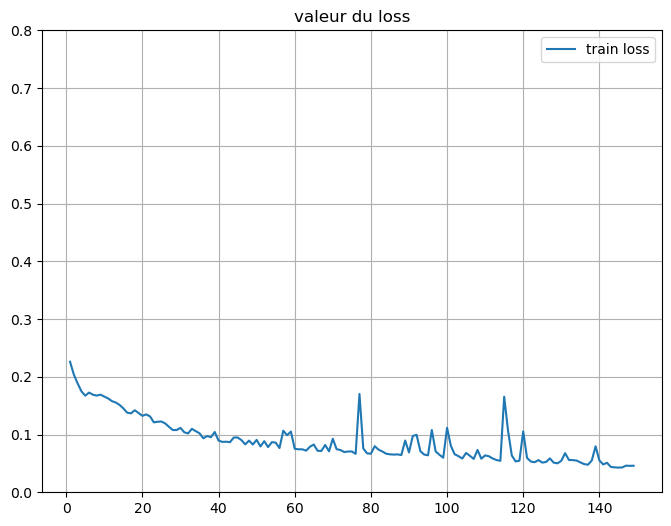

MLP train score: 0.973
MLP test score: 0.775


In [9]:
niter=150
score_train=[]
score_test=[]
loss_train=[]
MLP = neural_network.MLPClassifier(hidden_layer_sizes=(10,), alpha=0, activation="relu",
                                   warm_start=True,
                                   solver='sgd', learning_rate_init=0.05, random_state=1)
t0=time.time()
for k in range(1,niter):
    print("\r %d / %d" %(k,niter),end="")
    MLP.fit(X_train,y_train)
    loss_train.append(MLP.loss_)
    score_train.append(MLP.score(X_train,y_train)) #mean accuracy
    score_test.append(MLP.score(X_test,y_test))
t1=time.time()
print("\ntemps par epoch: %.3f s" %((t1-t0)/niter))
    
# train & test score plot
plt.figure(figsize=[8,6])
X=np.array(range(1,niter))
plt.plot(X,score_train,X,score_test)
plt.legend(['train','test'])
plt.title('score de classification')
plt.ylim(bottom=0.7,top=1.)
plt.grid()
plt.show()

# train loss plot
# (pas de possibilité simple d'obtenir le test loss)
plt.figure(figsize=[8,6])
X=np.array(range(1,niter))
plt.plot(X,loss_train)
plt.legend(['train loss'])
plt.title('valeur du loss')
plt.ylim(bottom=0.,top=0.8)
plt.grid()
plt.show()

# scores finaux:
print('MLP train score: %.3f' %MLP.score(X_train,y_train)) 
print('MLP test score: %.3f' %MLP.score(X_test,y_test))


__Questions__:

- Pourquoi, avec ce jeu de paramètres, devrait-on se limiter à une soixantaine d'itérations?

- Observez les problèmes de convergence si `learning_rate` est trop grand (essayez $0.05$) ou trop petit (essayez $0.001$). Revenez à $0.01$.

- Essayez différentes combinaison de l'architecture (une couche cachée avec 10 neurones, 50 neurones, 100 neurones, puis deux couches cachées avec le même nombre de neurones), et du paramètre `alpha` (0 pour ne pas régulariser, 1e-4 par défaut, 1e-2, 1e-1, 1), ou de l'activation (`relu` ou `logistic`). Quel est le réseau le plus performant ? Soyez attentif aux situations de surapprentissage.

Trois principes peuvent vous guider: 
- en situation de surapprentissage (grande différence entre scores d'apprentissage et de test qui finit par décroître), régularisez davantage
- si la régularisation ne fait que diminuer le score d'apprentissage mais n'augmente pas le score de test, c'est que votre réseau est trop compliqué: dans ce cas simplifiez-le
- si le score de test croît à peu près continûment, augmentez le nombre d'itérations car vous n'avez pas encore atteint l'optimum.

Fixer l'architecture et les hyperparamètres d'un réseau de neurones est assez rébarbatif... Il faut s'aider de l'expérience et de guides de "bonnes pratiques". Ne consacrez pas trop de temps à cet exercice!

_Indication_ : on n'arrive pas obtenir un score franchement supérieur à 0.85. Si vous arrivez à faire mieux, signalez-le nous! Comparez au meilleur classifieur du TP4.

<font color=red>
    
Réponses:
    
</font>

La cellule suivante permet l'affichage des résultats de la manière habituelle.

CPU times: total: 15.6 ms
Wall time: 7.11 ms
MLP score: 0.771500


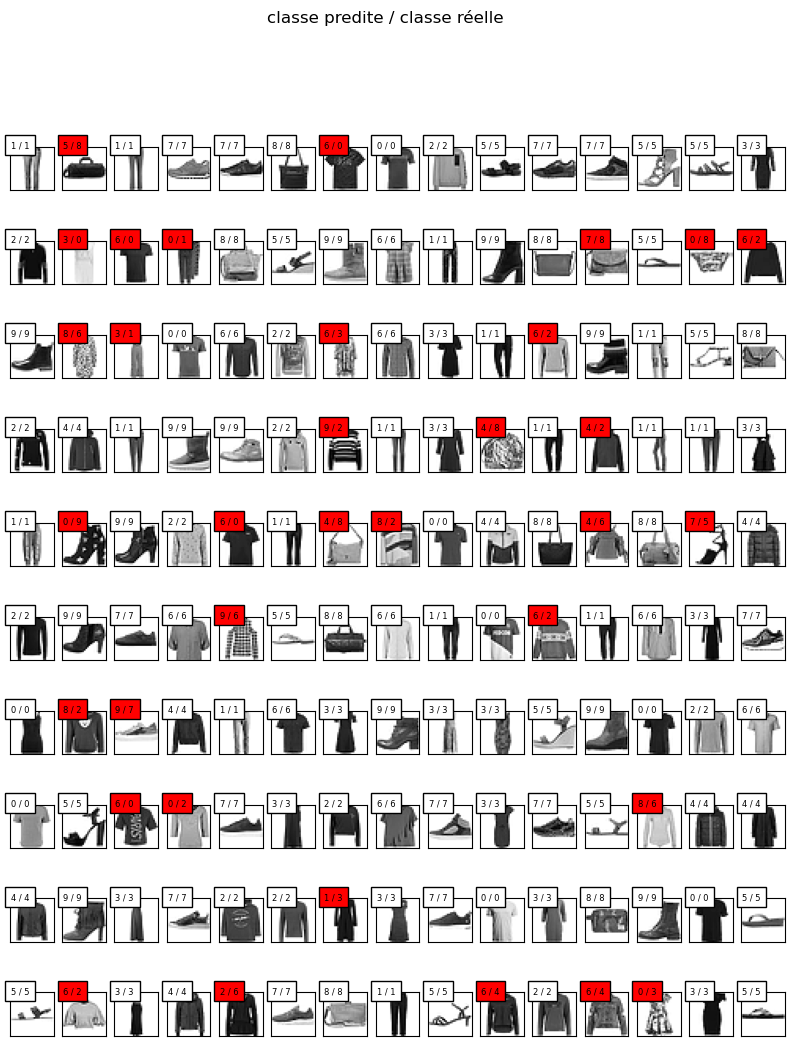

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       190
           1       0.95      0.93      0.94       223
           2       0.74      0.59      0.66       213
           3       0.79      0.81      0.80       209
           4       0.65      0.67      0.66       186
           5       0.87      0.84      0.86       207
           6       0.52      0.63      0.57       211
           7       0.84      0.86      0.85       180
           8       0.83      0.84      0.83       194
           9       0.86      0.86      0.86       187

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.77      0.77      2000

[[133   2   2  11   1   0  37   0   4   0]
 [  6 207   2   8   0   0   0   0   0   0]
 [  2   0 126   7  37   2  33   0   5   1]
 [ 11   6   1 169   6   0  12   0   4   0]
 [  1   0  17   9 125   0  30   0   1   3]
 [  3   0   0   0   1 174 

In [6]:
%time y_pred_MLP = MLP.predict(X_test)

print('MLP score: %f' % metrics.accuracy_score(y_test, y_pred_MLP))

affichage_150_images(X_test*255,y_test,y_pred_MLP)        

print(metrics.classification_report(y_test,y_pred_MLP))

print(metrics.confusion_matrix(y_test,y_pred_MLP))